___
# Modul 2 Python for Data Visualizations
Data Visualizations - Assignment
___
<center><em>Content Copyright by Ahmad Baihaqi Hidayat</em></center>

Diberikan sebuah dataset superstore.csv

Lakukan analisis dan visualisasi untuk menjawab beberapa pertanyaan dibawah ini

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.ticker import FuncFormatter
import folium
from statistics import mean
import json
import requests

1. Di bulan apa dan tahun berapa terjadi profit paling tinggi dari data tersebut

In [ ]:
# Membaca dataset
df = pd.read_csv('superstore.csv', parse_dates=['Order Date'])

# Membuat kolom tambahan untuk Tahun dan Bulan
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Mengelompokkan data berdasarkan kombinasi Tahun dan Bulan
monthly_profit = (
    df.groupby(['Year', 'Month'])['Profit']
      .sum()
      .reset_index()
)

# Mencari baris dengan Profit tertinggi
max_profit_row = monthly_profit.loc[monthly_profit['Profit'].idxmax()]

# Menampilkan hasil
print("Bulan dan Tahun dengan Profit tertinggi:")
print(f"Tahun  : {max_profit_row['Year']}")
print(f"Bulan  : {max_profit_row['Month']}")
print(f"Profit : {max_profit_row['Profit']:.2f}")

Bulan dan Tahun dengan Profit tertinggi:
Tahun  : 2017
Bulan  : 3
Profit : 123222866.00


2. Lakukan visualisasi yang tepat untuk menjawab pertanyaan nomor 1

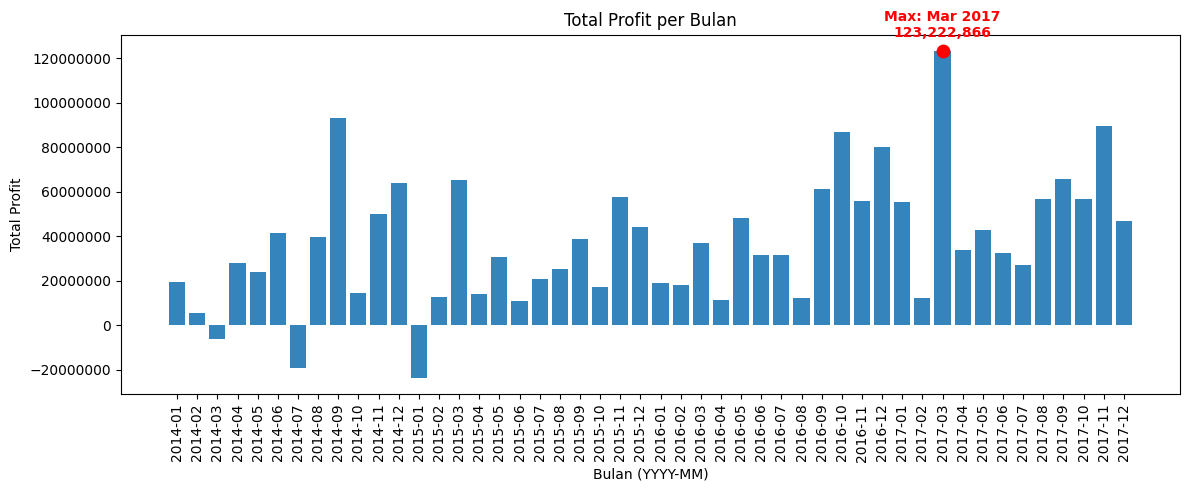

In [33]:
# Buat kolom YearMonth (tipe datetime pada awal bulan)
df['YearMonth'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

# Agregasi total profit per bulan
profit_monthly = df.groupby('YearMonth', as_index=False)['Profit'].sum().sort_values('YearMonth')

# Temukan bulan dengan profit tertinggi
idx_max = profit_monthly['Profit'].idxmax()
max_row = profit_monthly.loc[idx_max]

# Plot bar chart
plt.figure(figsize=(12,5))
bars = plt.bar(profit_monthly['YearMonth'].dt.strftime('%Y-%m'), profit_monthly['Profit'], alpha=0.9)
plt.xticks(rotation=90)
plt.xlabel('Bulan (YYYY-MM)')
plt.ylabel('Total Profit')
plt.ticklabel_format(style='plain', axis='y')  
plt.title('Total Profit per Bulan')

# Tandai dan beri anotasi pada nilai maksimum
x_label_of_max = max_row['YearMonth'].strftime('%Y-%m')
y_of_max = max_row['Profit']

# Cari posisi x index untuk anotasi (untuk keandalan saat x adalah string)
x_positions = list(profit_monthly['YearMonth'].dt.strftime('%Y-%m'))
x_idx = x_positions.index(x_label_of_max)
bar_x = bars[x_idx].get_x() + bars[x_idx].get_width()/2

plt.scatter([bar_x], [y_of_max], color='red', zorder=5, s=80)
plt.annotate(f"Max: {max_row['YearMonth'].strftime('%b %Y')}\n{y_of_max:,.0f}",
             xy=(bar_x, y_of_max),
             xytext=(0, 10),
             textcoords='offset points',
             ha='center',
             color='red',
             fontweight='bold')

plt.tight_layout()
plt.show()

3. Sales di tahun 2017 terbanyak pada category apa dan berapa jumlahnya

In [8]:
# Filter data hanya untuk tahun 2017
df_2017 = df[df['Order Date'].dt.year == 2017]

# Hitung total Sales per Category
sales_category_2017 = (
    df_2017.groupby('Category')['Sales']
    .sum()
    .reset_index()
    .sort_values(by='Sales', ascending=False)
)

# Ambil category dengan sales terbesar
top_category = sales_category_2017.iloc[0]
print("\nCategory dengan Sales terbanyak di tahun 2017:")
print(f"Category : {top_category['Category']}")
print(f"Total Sales : {top_category['Sales']:.2f}")


Category dengan Sales terbanyak di tahun 2017:
Category : Furniture
Total Sales : 157513806.00


4. Lakukan visualisasi untuk menjawab pertanyaan nomor 3

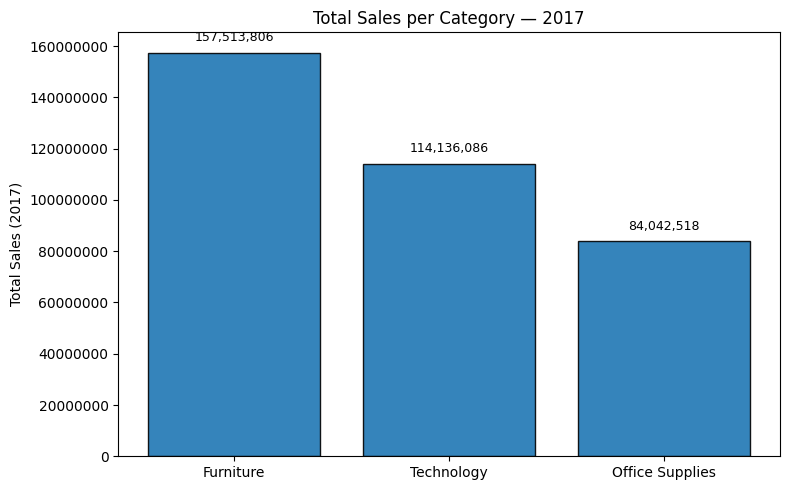

In [16]:
# Visualisasi: bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(sales_category_2017['Category'], sales_category_2017['Sales'], edgecolor='black', alpha=0.9)
plt.ylabel('Total Sales (2017)')
plt.ticklabel_format(style='plain', axis='y')  
plt.title('Total Sales per Category — 2017')
plt.xticks(rotation=0)

# Tambahkan label angka di atas masing-masing bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:,.0f}",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 6),
                 textcoords='offset points',
                 ha='center',
                 va='bottom',
                 fontsize=9)

plt.tight_layout()
plt.show()

5. Bagaimana rata - rata penjualan tiap region di tahun 2017

In [17]:
# Hitung rata-rata penjualan (mean Sales) per Region
avg_sales_region_2017 = (
    df_2017.groupby('Region', as_index=False)['Sales']
    .mean()
    .sort_values('Sales', ascending=False)
)

# Tampilkan hasil
print("Rata-rata penjualan per Region di tahun 2017:")
print(avg_sales_region_2017.to_string(index=False))

Rata-rata penjualan per Region di tahun 2017:
 Region         Sales
   West 114569.968037
  South 106786.249035
Central 106327.314910
   East 100108.976113


6. Lakukan visualisasi untuk menjawab pertanyaan nomor 5

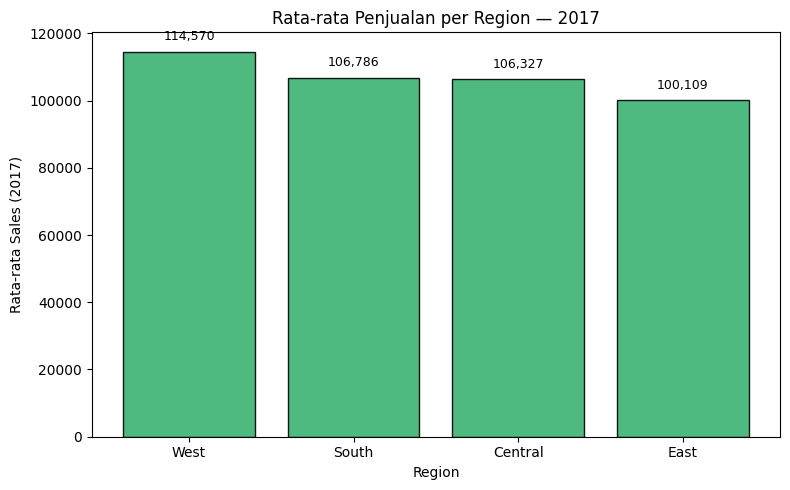

In [21]:
# Plot bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(avg_sales_region_2017['Region'], avg_sales_region_2017['Sales'], 
               color='mediumseagreen', edgecolor='black', alpha=0.9)
plt.ticklabel_format(style='plain', axis='y')

# Tambahkan label angka di atas bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:,.0f}",
                 xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 6),
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=9)

plt.title('Rata-rata Penjualan per Region — 2017')
plt.xlabel('Region')
plt.ylabel('Rata-rata Sales (2017)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

7. Pada tahun 2017 di bulan apa terjadi profit paling tinggi

In [23]:
# Tambahkan kolom bulan
df_2017['Month'] = df_2017['Order Date'].dt.month

# Hitung total profit per bulan
profit_month_2017 = (
    df_2017.groupby('Month', as_index=False)['Profit']
    .sum()
    .sort_values('Profit', ascending=False)
)

# Ambil bulan dengan profit tertinggi
top_month = profit_month_2017.iloc[0]

# Tampilkan hasil
month_name = pd.to_datetime(str(int(top_month['Month'])), format='%m').strftime('%B')

print("Bulan dengan profit tertinggi di tahun 2017:")
print(f"Bulan : {month_name}")
print(f"Profit: {top_month['Profit']:.2f}")

Bulan dengan profit tertinggi di tahun 2017:
Bulan : March
Profit: 123222866.00


8. Lakukan visualisasi untuk menjawab pertanyaan nomor 7

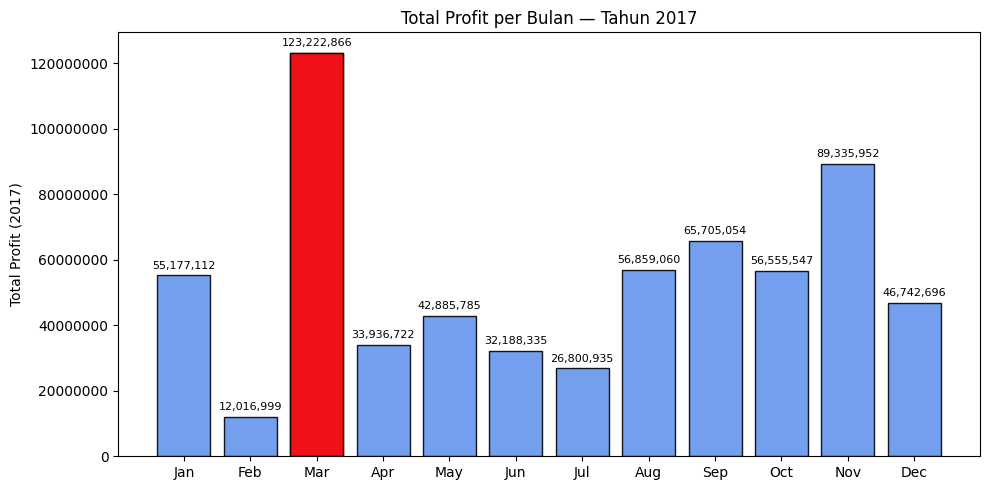

In [30]:
# Visualisasi (bar chart)
plt.figure(figsize=(10,5))
bars = plt.bar(profit_month_2017['Month'], profit_month_2017['Profit'], color='cornflowerblue', edgecolor='black', alpha=0.9)
plt.xticks(profit_month_2017['Month'], [pd.to_datetime(str(m), format='%m').strftime('%b') for m in profit_month_2017['Month']])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{height:,.0f}",
                 xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', fontsize=8)
max_idx = profit_month_2017['Profit'].idxmax()
max_month = int(profit_month_2017.loc[max_idx, 'Month'])
max_profit = float(profit_month_2017.loc[max_idx, 'Profit'])

# Tandai bulan dengan profit tertinggi (warna merah)
plt.bar(max_month, max_profit, color='red', edgecolor='black', alpha=0.9)
month_name = pd.to_datetime(str(max_month), format='%m').strftime('%B')

# Label dan judul
plt.title('Total Profit per Bulan — Tahun 2017')
plt.ylabel('Total Profit (2017)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## Challange Soal

9. Berdasarkan visualisasi yang sudah anda buat di soal sebelumnya, Lakukan pembuatan Dashboard menggunakan subplots

**Contoh**
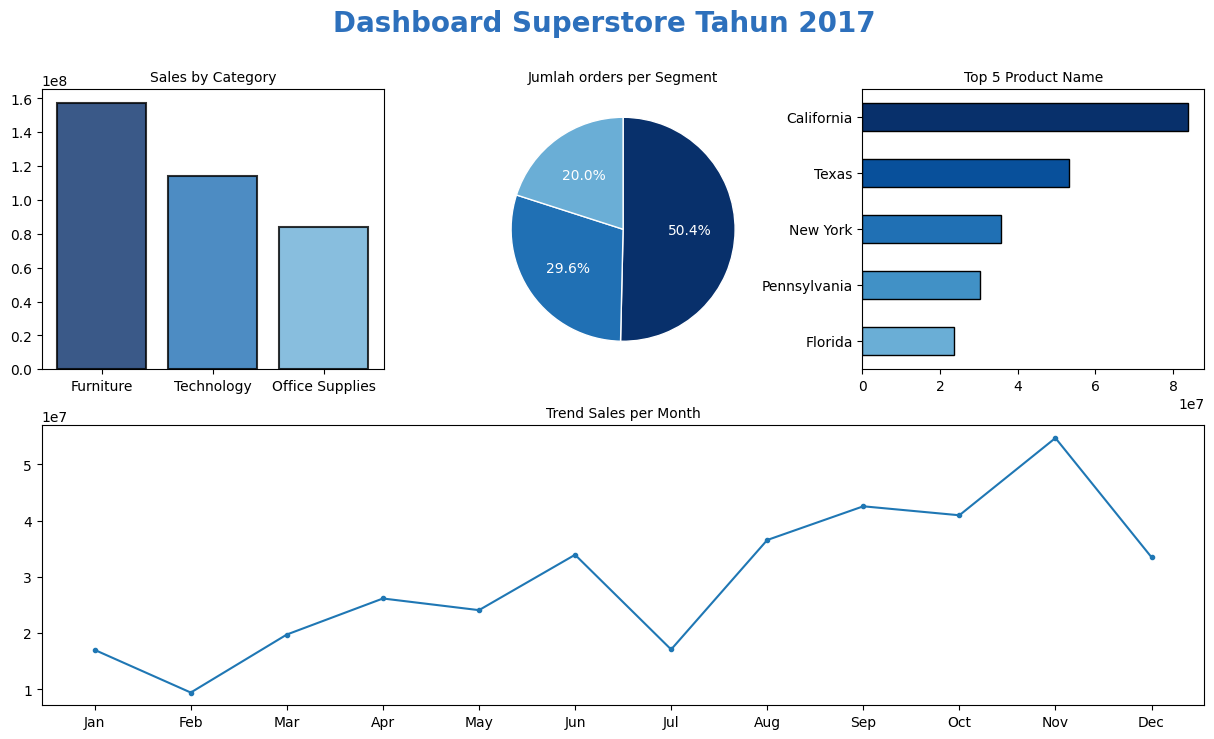

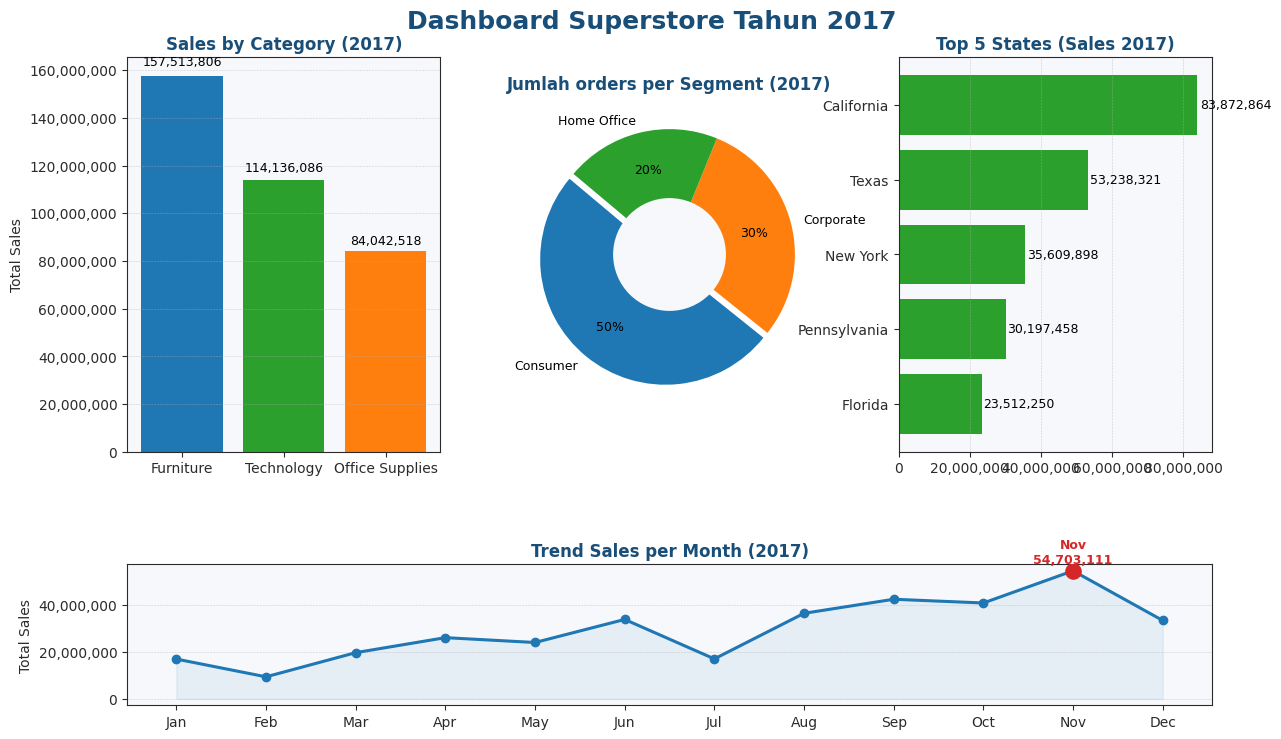

In [38]:
# Siapkan data umum
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['MonthName'] = df['Order Date'].dt.strftime('%b')

# Filter 2017 untuk banyak panel
df_2017 = df[df['Year'] == 2017].copy()

# A: Sales per Category (2017)
sales_by_cat = (df_2017.groupby('Category', as_index=False)['Sales']
                .sum().sort_values('Sales', ascending=False))

# B: Segment distribution (jumlah order per Segment, 2017)
segment_counts = (df_2017['Segment']
                  .value_counts()
                  .reindex(['Consumer','Corporate','Home Office'])  # jika ada urutan
                  .fillna(0))

# C: Top 5 States by Sales (2017)
top_states = (df_2017.groupby('State', as_index=False)['Sales']
              .sum().sort_values('Sales', ascending=False).head(5))

# D: Trend Sales per Month (2017)
sales_month = (df_2017.groupby('Month', as_index=False)['Sales']
               .sum().sort_values('Month'))

# Helper untuk format angka
def id_currency(x, pos):
    return f'{int(x):,}'
fmt = FuncFormatter(id_currency)

# Style settings
plt.rcParams.update({
    'figure.facecolor': '#ffffff',
    'axes.facecolor': '#f6f8fb',
    'axes.edgecolor': '#2b2b2b',
    'axes.labelcolor': '#2b2b2b',
    'xtick.color': '#2b2b2b',
    'ytick.color': '#2b2b2b',
    'font.size': 10,
    'font.family': 'sans-serif'
})
palette = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#8c564b']
accent = '#184e77'   # warna aksen

# Build dashboard (2x2 layout but custom sizes)
fig = plt.figure(figsize=(14, 8), constrained_layout=False)
grid = fig.add_gridspec(3, 6, hspace=0.8, wspace=0.6)

# Top-left: Sales by Category (bar)
ax1 = fig.add_subplot(grid[0:2, 0:2])
bars = ax1.bar(sales_by_cat['Category'], sales_by_cat['Sales'], color=palette[:len(sales_by_cat)], edgecolor='none')
ax1.set_title('Sales by Category (2017)', fontsize=12, fontweight='bold', color=accent)
ax1.yaxis.set_major_formatter(fmt)
ax1.set_xlabel('')
ax1.set_ylabel('Total Sales', fontsize=10)
ax1.grid(axis='y', linestyle='--', linewidth=0.4, alpha=0.6)

# Annotate values on top
for bar in bars:
    h = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, h + h*0.02, f"{int(h):,}", ha='center', va='bottom', fontsize=9)

# Top-middle: Segment pie
ax2 = fig.add_subplot(grid[0:2, 2:4])
sizes = segment_counts.values
labels = segment_counts.index.tolist()
explode = [0.05 if i==0 else 0 for i in range(len(sizes))]
wedges, texts, autotexts = ax2.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=140,
                                   pctdistance=0.7, explode=explode, textprops={'fontsize':9})
ax2.set_title('Jumlah orders per Segment (2017)', fontsize=12, fontweight='bold', color=accent)

# Add small circle for donut look
centre_circle = plt.Circle((0,0),0.45,fc='#f6f8fb')
ax2.add_artist(centre_circle)

# Top-right: Top 5 States (horizontal bar)
ax3 = fig.add_subplot(grid[0:2, 4:6])
ax3.barh(top_states['State'][::-1], top_states['Sales'][::-1], color=palette[1], edgecolor='none')
ax3.set_title('Top 5 States (Sales 2017)', fontsize=12, fontweight='bold', color=accent)
ax3.xaxis.set_major_formatter(fmt)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(axis='x', linestyle='--', linewidth=0.4, alpha=0.6)

# Annotate
for i, (s, v) in enumerate(zip(top_states['State'][::-1], top_states['Sales'][::-1])):
    ax3.text(v + v*0.01, i, f"{int(v):,}", va='center', fontsize=9)

# Bottom (full width): Trend Sales per Month
ax4 = fig.add_subplot(grid[2, 0:6])
ax4.plot(sales_month['Month'], sales_month['Sales'], marker='o', linewidth=2.2, color=palette[0])
ax4.fill_between(sales_month['Month'], sales_month['Sales'], alpha=0.08, color=palette[0])
ax4.set_xticks(sales_month['Month'])
ax4.set_xticklabels([pd.to_datetime(str(m), format='%m').strftime('%b') for m in sales_month['Month']])
ax4.set_title('Trend Sales per Month (2017)', fontsize=12, fontweight='bold', color=accent)
ax4.yaxis.set_major_formatter(fmt)
ax4.set_xlabel('')
ax4.set_ylabel('Total Sales', fontsize=10)
ax4.grid(axis='y', linestyle='--', linewidth=0.4, alpha=0.6)

# Highlight the peak month
peak_idx = sales_month['Sales'].idxmax()
peak_month = sales_month.loc[peak_idx, 'Month']
peak_val = sales_month.loc[peak_idx, 'Sales']
ax4.scatter([peak_month], [peak_val], s=120, color='#d62728', zorder=5)
ax4.annotate(f"{pd.to_datetime(str(int(peak_month)), format='%m').strftime('%b')}\n{int(peak_val):,}",
             xy=(peak_month, peak_val),
             xytext=(peak_month, peak_val*1.06),
             ha='center', color='#d62728', fontsize=9, fontweight='bold',
             arrowprops=dict(arrowstyle='-|>', color='#d62728', lw=0.8))

# Title and footer
fig.suptitle('Dashboard Superstore Tahun 2017', fontsize=18, fontweight='bold', color=accent)
plt.subplots_adjust(top=0.92, hspace=0.8, wspace=0.6)
plt.show()

10. Pada tahun 2017 State mana yang mendapatkan Sales paling banyak dan lakukan visualisasi menggunakan folium

In [51]:
# 1) Load dataset
df = pd.read_csv('superstore.csv', parse_dates=['Order Date'])
df_2017 = df[df['Order Date'].dt.year == 2017].copy()

# Pastikan kolom State tersedia
if 'State' not in df_2017.columns:
    raise KeyError("Kolom 'State' tidak ditemukan di dataset. Pastikan dataset berisi kolom 'State'.")

# Hitung total Sales per State dan persen kontribusi
sales_state_2017 = (
    df_2017.groupby('State', as_index=False)['Sales']
    .sum()
    .sort_values('Sales', ascending=False)
).reset_index(drop=True)
total_all = sales_state_2017['Sales'].sum()
sales_state_2017['Pct'] = sales_state_2017['Sales'] / total_all * 100

# 2) Load GeoJSON AS
us_geo_url = 'https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/us-states.json'
resp = requests.get(us_geo_url)
if resp.status_code != 200:
    raise ConnectionError(f"Gagal mengunduh GeoJSON dari {us_geo_url}")
us_geo = resp.json()

# 3) Normalisasi nama state (tanpa print warning)
mapping_suggestions = {
    'Washington DC': 'District of Columbia',
    'District Of Columbia': 'District of Columbia',
    'D.C.': 'District of Columbia',
    'DC': 'District of Columbia',
}
sales_state_2017['State_norm'] = sales_state_2017['State'].str.strip()
sales_state_2017['State_norm'] = sales_state_2017['State_norm'].replace(mapping_suggestions)
sales_lookup = sales_state_2017.set_index('State_norm')[['Sales', 'Pct']].to_dict(orient='index')
orig_to_norm = dict(zip(sales_state_2017['State'], sales_state_2017['State_norm']))

# 4) Sisipkan data sales & pct ke properti GeoJSON
for feature in us_geo['features']:
    name = feature['properties'].get('name')
    info = sales_lookup.get(name)
    if info:
        sales_val = int(info['Sales'])
        pct_val = float(info['Pct'])
    else:
        sales_val = 0
        pct_val = 0.0
    feature['properties']['sales_str'] = f"{sales_val:,}"
    feature['properties']['pct_str'] = f"{pct_val:.2f}%"

# 5) Buat peta dasar
m = folium.Map(location=[37.8, -96], zoom_start=4, tiles='cartodbpositron')

# Tambahkan layer choropleth
folium.Choropleth(
    geo_data=us_geo,
    name='Choropleth',
    data=sales_state_2017,
    columns=['State_norm', 'Sales'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.8,
    line_opacity=0.3,
    nan_fill_color='white',
    legend_name='Total Sales per State (2017)'
).add_to(m)

# 6) Tambahkan tooltip & popup interaktif
geojson_with_tooltip = folium.GeoJson(
    us_geo,
    name='State Info',
    style_function=lambda f: {'fillOpacity': 0, 'weight': 0.5, 'color': '#444444'},
    highlight_function=lambda f: {'fillColor': '#ffff00', 'fillOpacity': 0.2, 'weight': 1.5, 'color': '#333333'}
).add_to(m)

tooltip = folium.features.GeoJsonTooltip(
    fields=['name', 'sales_str', 'pct_str'],
    aliases=['State:', 'Total Sales:', '% of total:'],
    localize=False,
    labels=True,
    sticky=True,
    toLocaleString=False
)
popup = folium.features.GeoJsonPopup(
    fields=['name', 'sales_str', 'pct_str'],
    aliases=['State:', 'Total Sales:', '% of total:'],
    localize=False,
    labels=True,
    style="background-color: white;"
)
geojson_with_tooltip.add_child(tooltip)
geojson_with_tooltip.add_child(popup)

# 7) Soroti top state
top_row = sales_state_2017.sort_values('Sales', ascending=False).iloc[0]
top_state = top_row['State_norm']
top_state_name = top_row['State']
top_sales_val = int(top_row['Sales'])

# Temukan feature GeoJSON top_state
top_feature = next((f for f in us_geo['features'] if f['properties'].get('name') == top_state), None)

if top_feature:
    top_geojson = folium.GeoJson(
        top_feature,
        name='Top State Highlight',
        style_function=lambda f: {'fillColor': '#ffcc00', 'color': '#ff9900', 'weight': 1.6, 'fillOpacity': 0.45},
        highlight_function=lambda f: {'fillColor': '#ffdd66', 'fillOpacity': 0.6, 'weight': 2, 'color': '#cc6600'}
    ).add_to(m)

    tooltip_top = folium.GeoJsonTooltip(
        fields=['name', 'sales_str', 'pct_str'],
        aliases=['State:', 'Total Sales:', '% of total:'],
        localize=False,
        labels=True,
        sticky=True,
        toLocaleString=False
    )
    popup_top = folium.GeoJsonPopup(
        fields=['name', 'sales_str', 'pct_str'],
        aliases=['State:', 'Total Sales:', '% of total:'],
        localize=False,
        labels=True,
        style="background-color: white;"
    )
    top_geojson.add_child(tooltip_top)
    top_geojson.add_child(popup_top)

    # Hitung perkiraan centroid (tengah area)
    coords = top_feature['geometry']['coordinates']
    pts = []
    geom_type = top_feature['geometry']['type']
    if geom_type == 'Polygon':
        for ring in coords:
            for lon, lat in ring:
                pts.append((lat, lon))
    else:  # MultiPolygon
        for poly in coords:
            for ring in poly:
                for lon, lat in ring:
                    pts.append((lat, lon))
    if pts:
        avg_lat = sum([p[0] for p in pts]) / len(pts)
        avg_lon = sum([p[1] for p in pts]) / len(pts)
        folium.Marker(
            location=(avg_lat, avg_lon),
            tooltip=f"Top State: {top_state_name}\nTotal Sales: {top_sales_val:,}",
            popup=f"<b>{top_state_name}</b><br>Total Sales (2017): {top_sales_val:,}",
            icon=folium.Icon(color='red', icon='star')
        ).add_to(m)

# 8) Simpan hasil
folium.LayerControl().add_to(m)
output_file = 'sales_state_2017_map_interactive.html'
m.save(output_file)

print(f"\nPeta interaktif disimpan sebagai: {output_file}")
print("Silakan buka file HTML tersebut di browser untuk melihat hasilnya.")



Peta interaktif disimpan sebagai: sales_state_2017_map_interactive.html
Silakan buka file HTML tersebut di browser untuk melihat hasilnya.
